---
---

# 社交媒体可以预测新冠疫情吗？

基于知微事见数据

---
---

http://xgml.zhiweidata.net/?from=floating#/


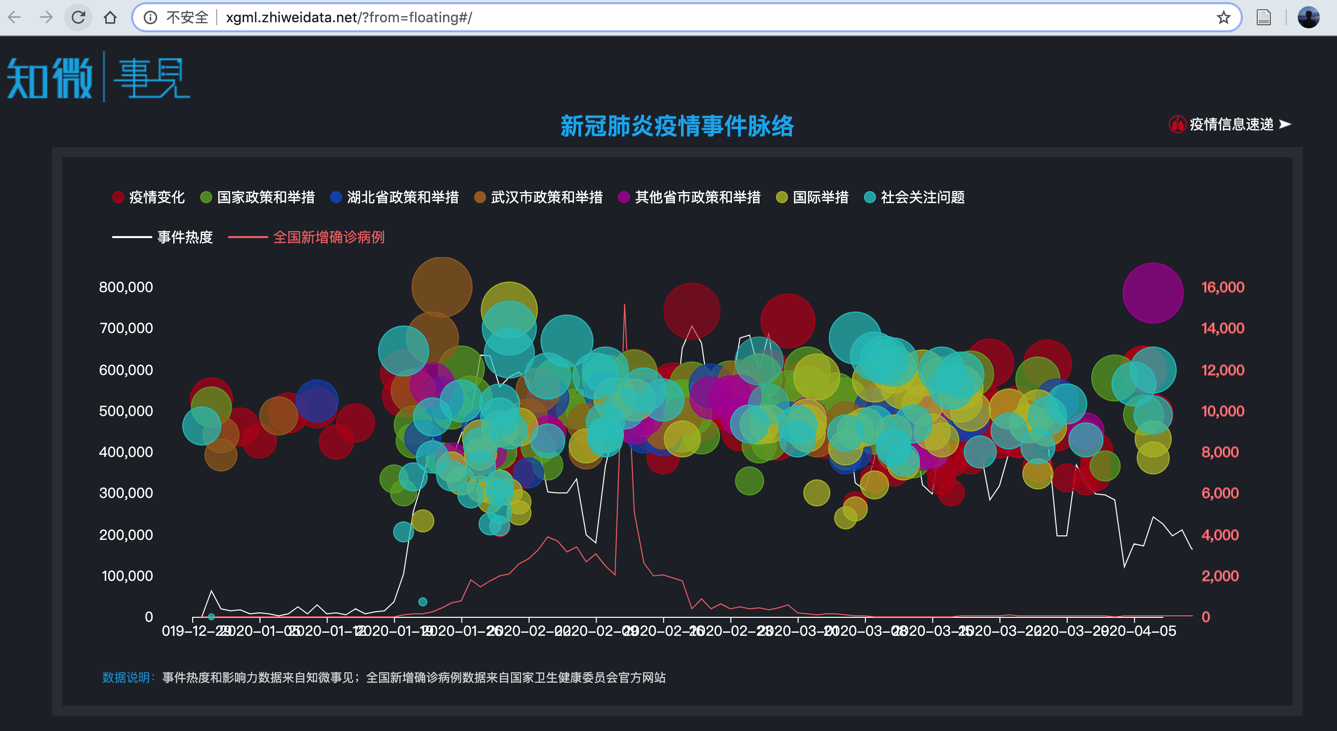

In [1]:
%%html
<iframe frameborder="no" border="0" marginwidth="0" marginheight="0" 
    width=900 height=600 
    src="//xgml.zhiweidata.net/?from=floating#/">
</iframe>

In [1]:
import pylab as plt
import pandas as pd
import seaborn as sns
import json

In [86]:
#j = json.load(open('../data/zhiwei_line.json'))
j = json.load(open('../data/zhiwei_line0417.json'))
df = pd.DataFrame(j)
df.tail()

,time,voice,heat,case,allCase
100,2020-04-08,,225533,63,81865
101,2020-04-09,,197162,42,81907
102,2020-04-10,,212046,31,81953
103,2020-04-11,,164010,31,82052
104,2020-04-12,,157726,31,82160


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   time     105 non-null    object
 1   voice    105 non-null    object
 2   heat     105 non-null    object
 3   case     105 non-null    object
 4   allCase  105 non-null    object
dtypes: object(5)
memory usage: 4.2+ KB


In [54]:
df['time'][:3]

0    2019-12-30
1    2019-12-31
2    2020-01-01
Name: time, dtype: object

In [97]:
df['heat'] = [np.float(i) for i in df['heat']]
df['case'] = [np.int(i) for i in df['case']]

In [98]:
df['heat']

0           2.00000
1       62978.12912
2       19890.45538
3       13725.50326
4       16509.66362
           ...     
100    225533.00000
101    197162.00000
102    212046.00000
103    164010.00000
104    157726.00000
Name: heat, Length: 105, dtype: float64

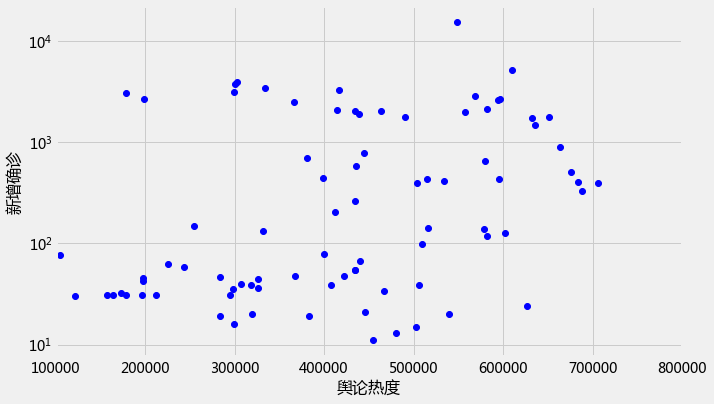

In [107]:
plt.figure(figsize = [10, 6])
plt.plot(df['heat'], df['case'], 'bo')
plt.yscale('log')
#plt.xscale('log')
plt.ylabel('新增确诊', fontsize = 16)
plt.xlabel('舆论热度', fontsize = 16)
plt.xlim([100000, 800000])
plt.show()

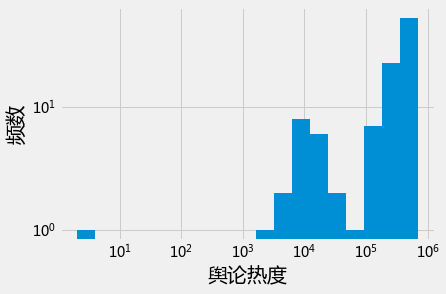

In [110]:
MIN = df['heat'].min()
MAX = df['heat'].max()

bins = 10 ** np.linspace( np.log10(MIN), np.log10(MAX),20 )
plt.hist(df['heat'], bins = bins)
plt.xlabel('舆论热度', fontsize = 20)
plt.ylabel('频数', fontsize = 20)
plt.xscale('log')
plt.yscale('log')
plt.show()

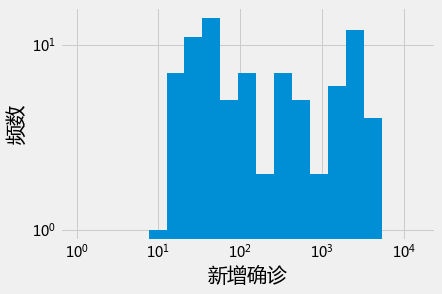

In [112]:
MIN = df['case'].min()+1
MAX = df['case'].max()

bins = 10 ** np.linspace( np.log10(MIN), np.log10(MAX),20 )
plt.hist(df['case'], bins = bins)
plt.xlabel('新增确诊', fontsize = 20)
plt.ylabel('频数', fontsize = 20)
plt.xscale('log')
plt.yscale('log')
plt.show()

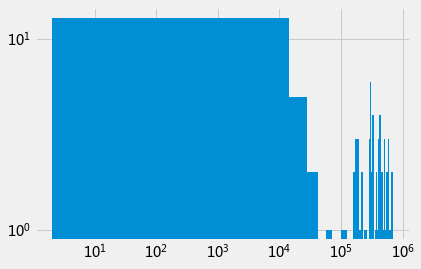

In [109]:
plt.hist( df['heat'], bins = 50)
plt.yscale('log')
plt.xscale('log')
plt.show()

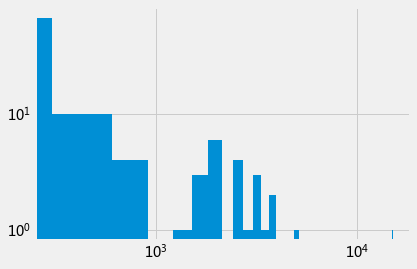

In [108]:
#plt.hist( df['heat'], bins = 50)
plt.hist( df['case'], bins = 50)
plt.yscale('log')
plt.xscale('log')
plt.show()

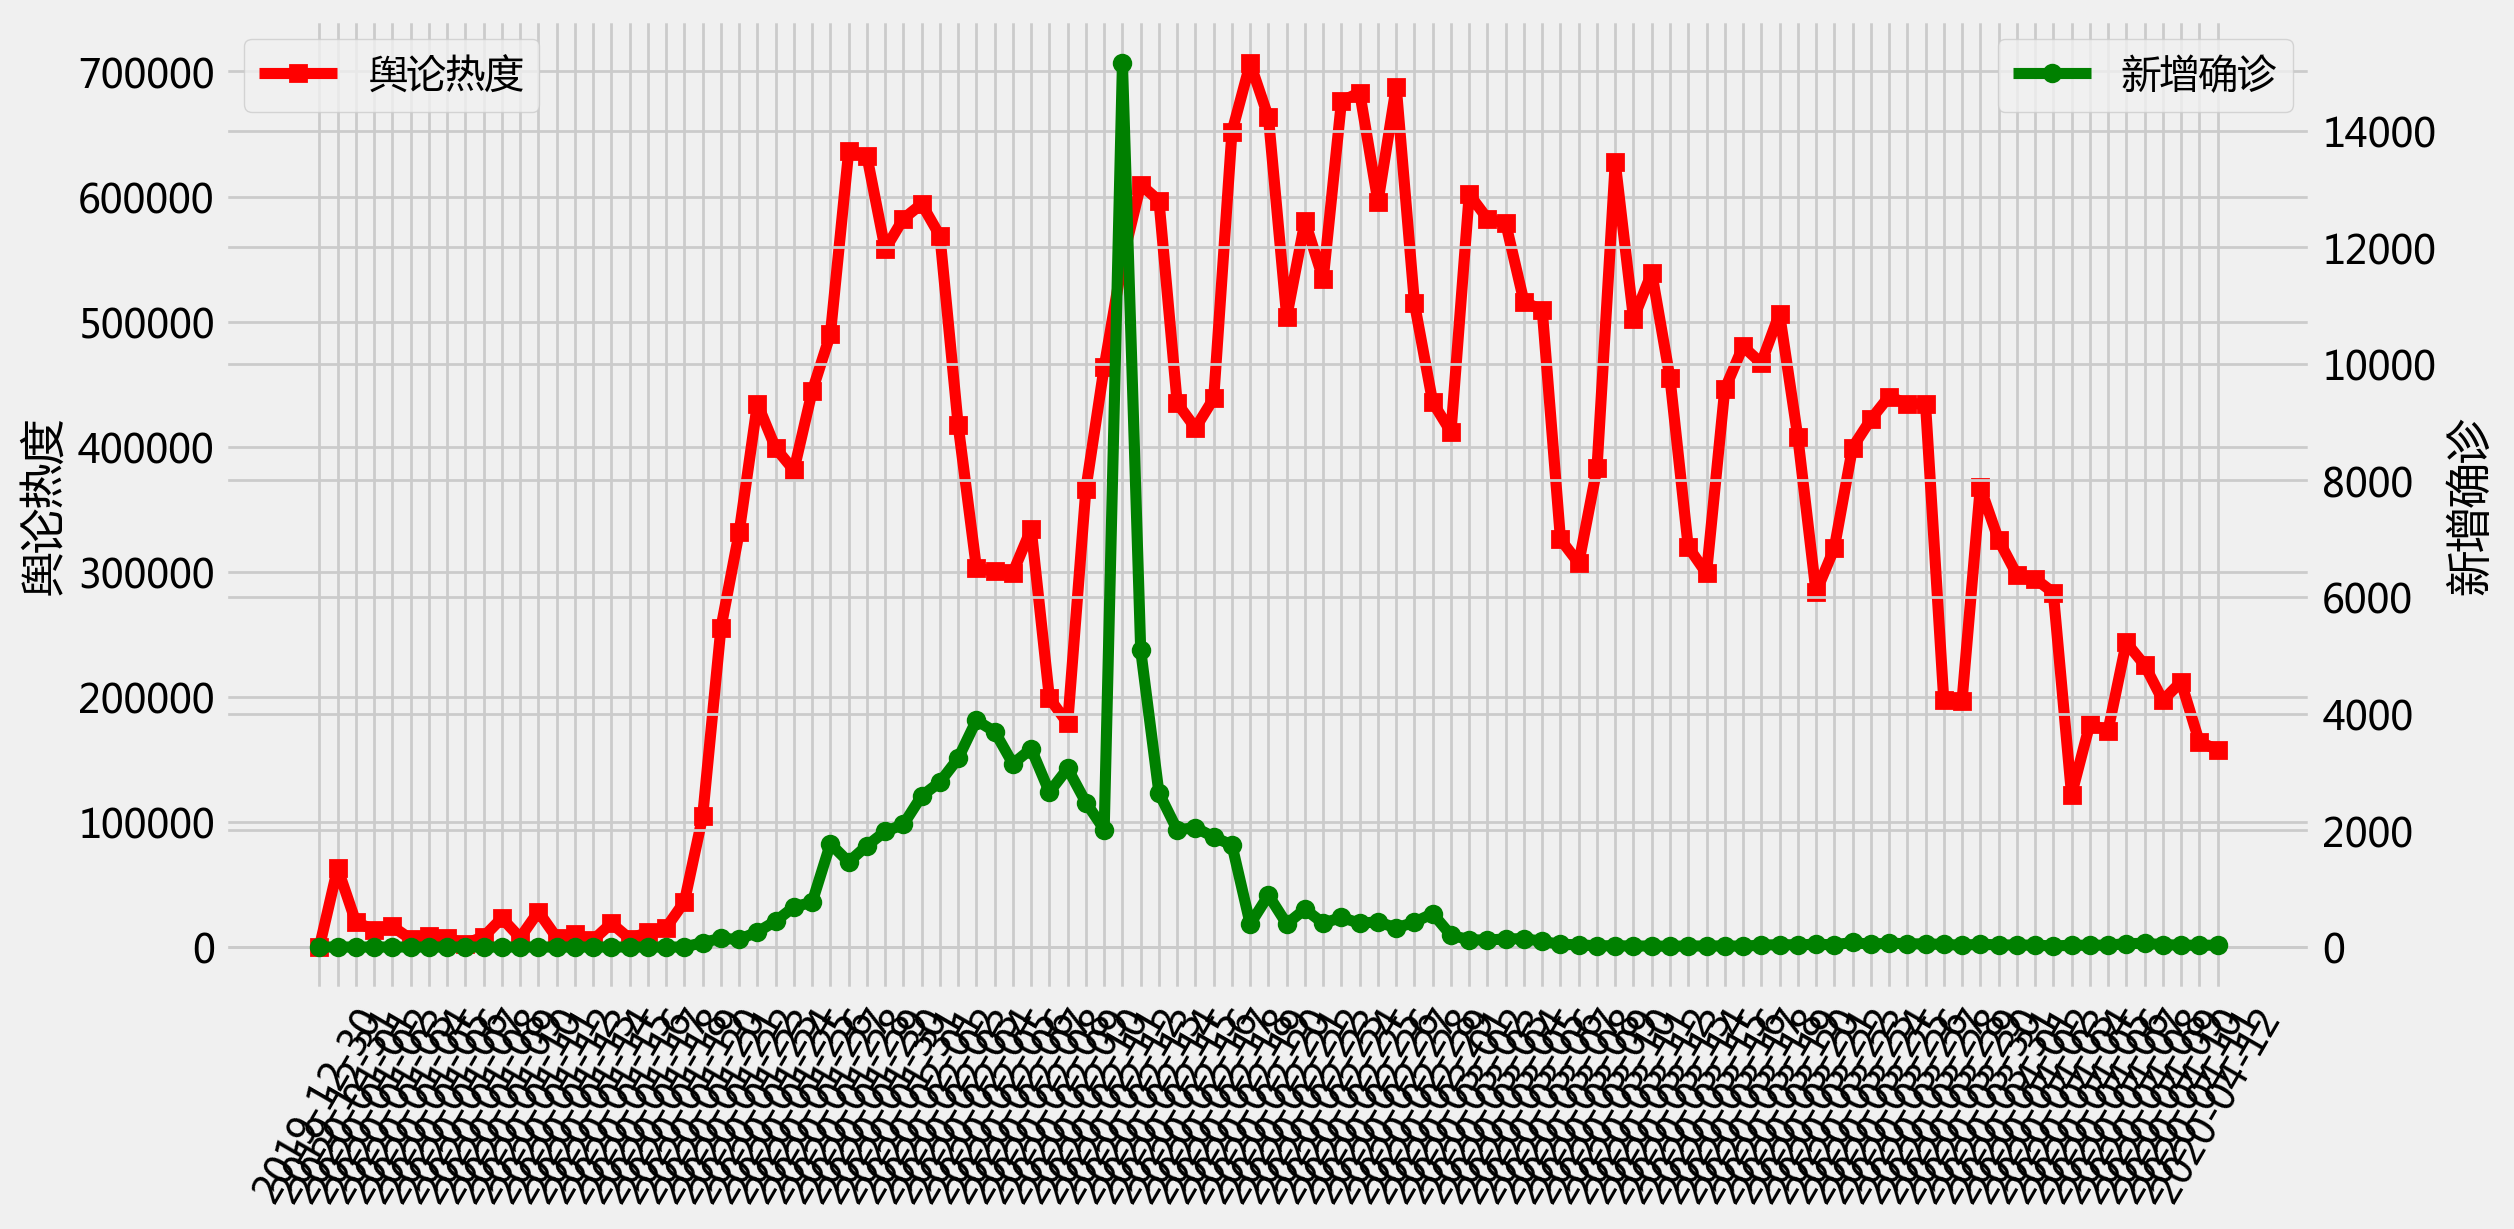

In [113]:
# plot
fig = plt.figure(figsize=(12,6),dpi = 200)
plt.style.use('fivethirtyeight')

ax1=fig.add_subplot(111)
ax1.plot(df['time'],  df['heat'], 'r-s')
ax1.set_ylabel('舆论热度', fontsize = 16)
ax1.tick_params(axis='x', rotation=60)
ax1.legend(('舆论热度',),loc='upper left')
#ax1.set_yscale('log')

ax2=ax1.twinx()
ax2.plot(df['time'], df['case'], 'g-o')
ax2.set_ylabel('新增确诊', fontsize = 16)
ax2.legend(('新增确诊',),loc='upper right')
#ax2.set_yscale('log')

plt.show()

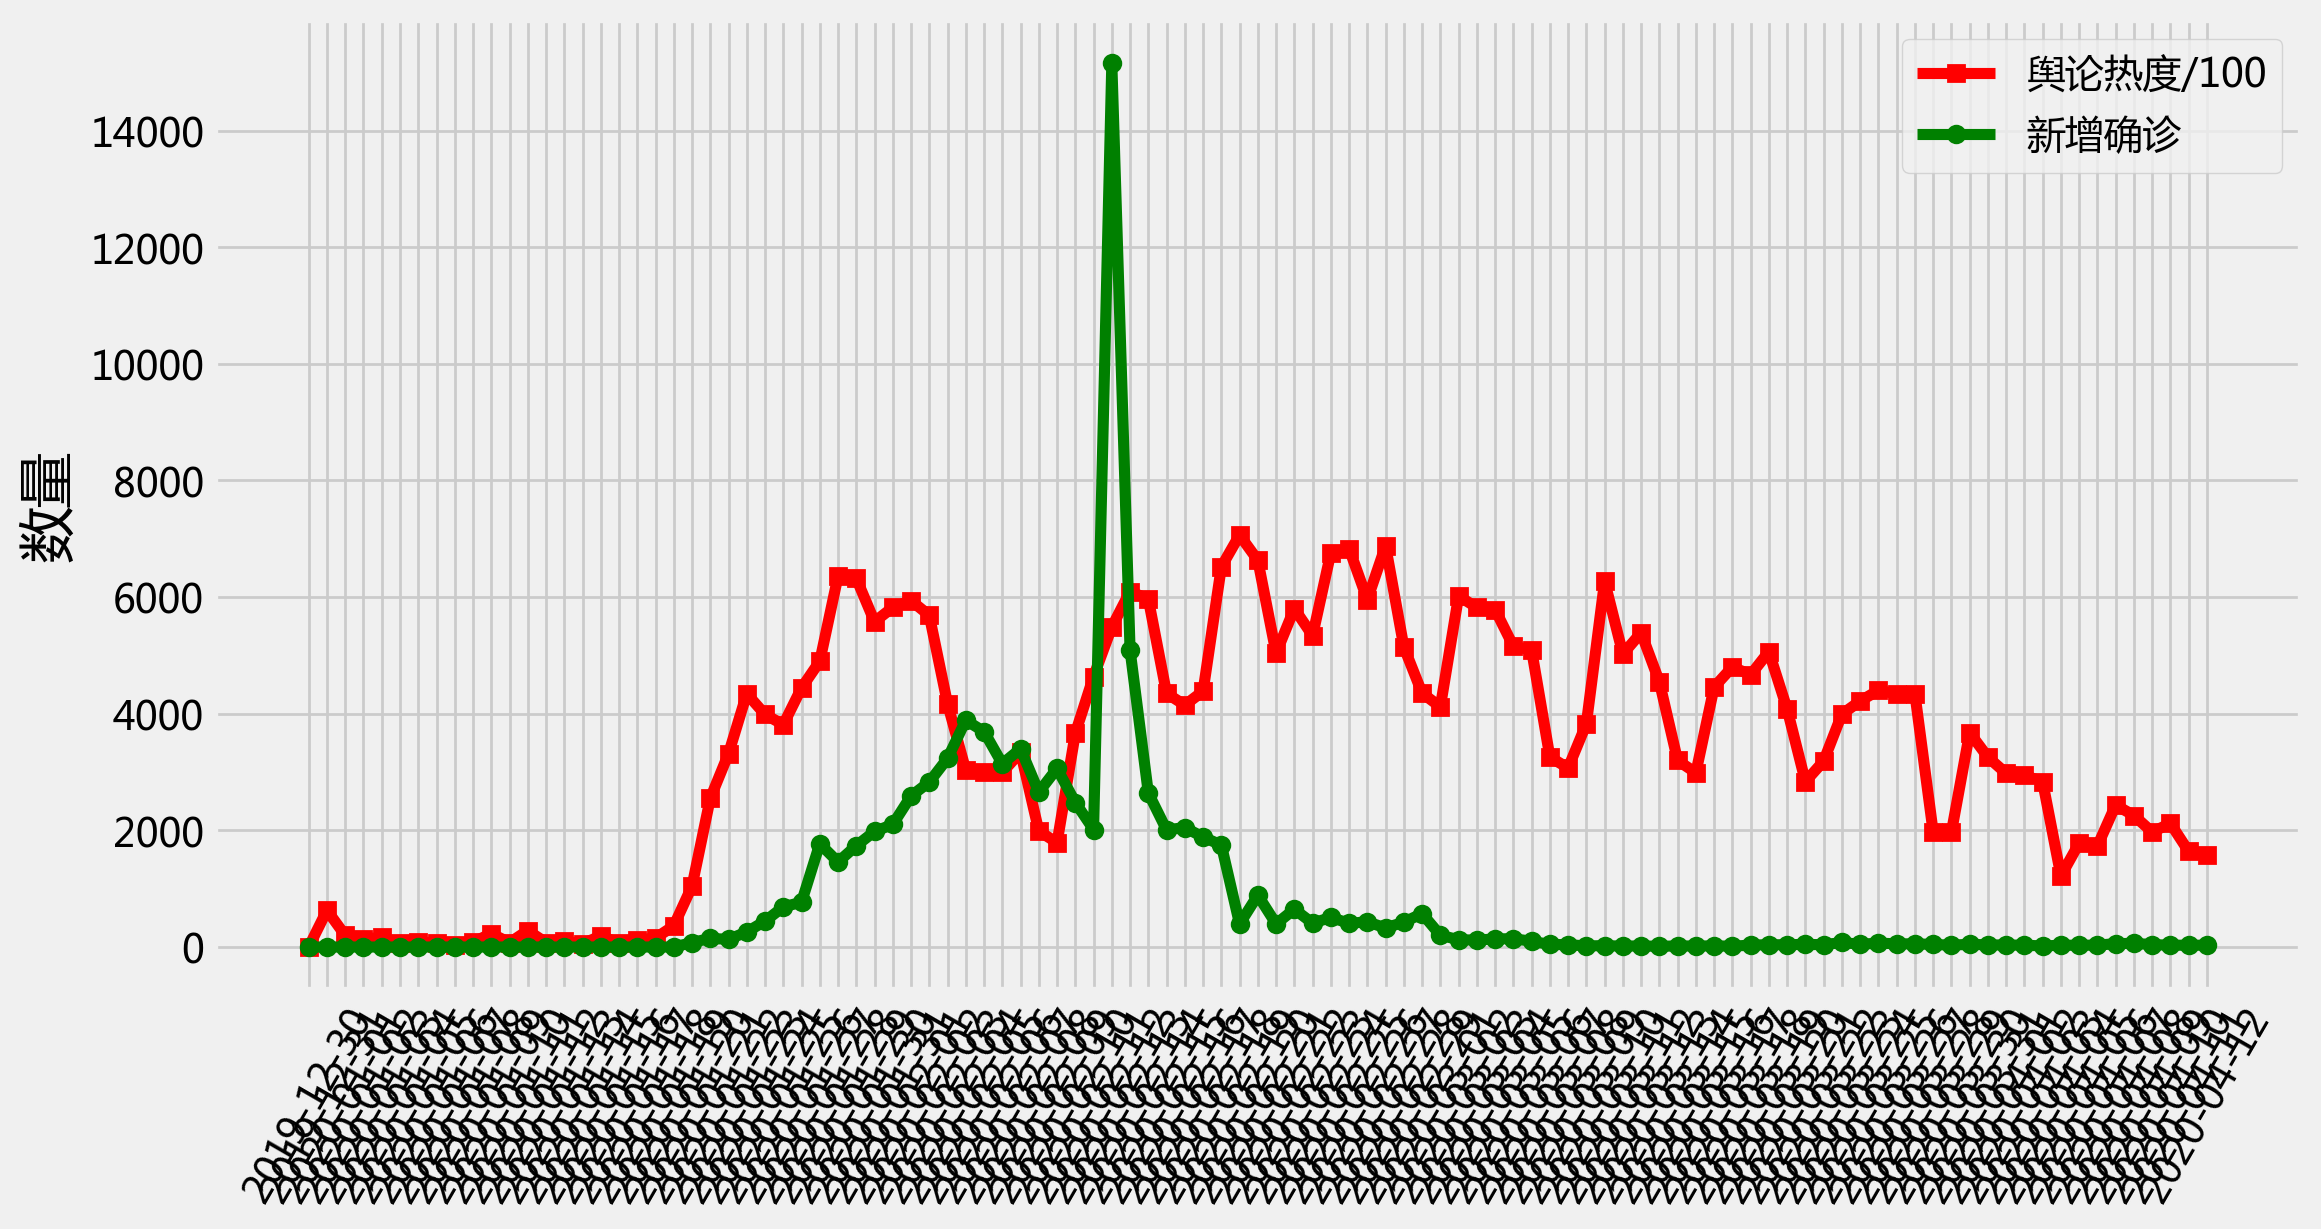

In [61]:
# plot
plt.figure(figsize=(12, 6), dpi = 200)
plt.style.use('fivethirtyeight')
plt.plot(df['time'], [float(i)/100 for i in df['heat']], 'r-s', label = '舆论热度/100')
plt.plot(df['time'], [int(i) for i in df['case']], 'g-o', label = '新增确诊')
plt.legend()
plt.xticks(rotation=60)
plt.ylabel('数量', fontsize = 20)
plt.show()

# 格兰杰因果检验

http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.grangercausalitytests.html

In [62]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np

help(df.pct_change)

Percentage change between the current and a prior element.
    
    Computes the percentage change from the immediately previous row by
    default. This is useful in comparing the percentage of change in a time
    series of elements.
    

## The Null hypothesis for grangercausalitytests 

> H0: the time series in the second column, x2, does NOT Granger cause the time series in the first column, x1. 

Grange causality means that past values of x2 have a statistically significant effect on the current value of x1, taking past values of x1 into account as regressors. We reject the null hypothesis that x2 does not Granger cause x1 if the pvalues are below a desired size of the test.

In [63]:
grangercausalitytests?
# The data for test whether the time series in the second column Granger
#     causes the time series in the first column. Missing values are not
#     supported.

In [64]:
data = df[21:][['case','heat' ]].pct_change().dropna()

In [65]:
data.head()

,case,heat
22,0.935065,1.442401
23,-0.120805,0.299869
24,0.977099,0.310704
25,0.714286,-0.081957
26,0.549550,-0.044222


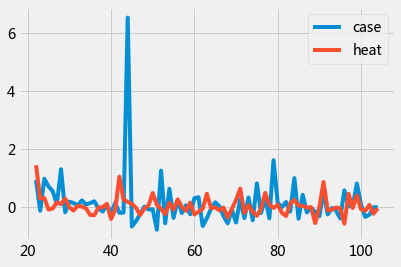

In [66]:
data.plot();

In [67]:
gc_res = grangercausalitytests(data,4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2522  , p=0.6169  , df_denom=79, df_num=1
ssr based chi2 test:   chi2=0.2618  , p=0.6089  , df=1
likelihood ratio test: chi2=0.2613  , p=0.6092  , df=1
parameter F test:         F=0.2522  , p=0.6169  , df_denom=79, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=12.3885 , p=0.0000  , df_denom=76, df_num=2
ssr based chi2 test:   chi2=26.4070 , p=0.0000  , df=2
likelihood ratio test: chi2=22.8563 , p=0.0000  , df=2
parameter F test:         F=12.3885 , p=0.0000  , df_denom=76, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.8247  , p=0.0000  , df_denom=73, df_num=3
ssr based chi2 test:   chi2=29.0127 , p=0.0000  , df=3
likelihood ratio test: chi2=24.7550 , p=0.0000  , df=3
parameter F test:         F=8.8247  , p=0.0000  , df_denom=73, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.1783  , p=0.0003  , df_d

In [68]:
data1 = df[21:][['heat','case']].pct_change().dropna()
gc_res1 = grangercausalitytests(data1,4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0044  , p=0.9473  , df_denom=79, df_num=1
ssr based chi2 test:   chi2=0.0046  , p=0.9461  , df=1
likelihood ratio test: chi2=0.0046  , p=0.9461  , df=1
parameter F test:         F=0.0044  , p=0.9473  , df_denom=79, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0877  , p=0.9162  , df_denom=76, df_num=2
ssr based chi2 test:   chi2=0.1869  , p=0.9108  , df=2
likelihood ratio test: chi2=0.1866  , p=0.9109  , df=2
parameter F test:         F=0.0877  , p=0.9162  , df_denom=76, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7988  , p=0.4985  , df_denom=73, df_num=3
ssr based chi2 test:   chi2=2.6262  , p=0.4529  , df=3
likelihood ratio test: chi2=2.5840  , p=0.4603  , df=3
parameter F test:         F=0.7988  , p=0.4985  , df_denom=73, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8460  , p=0.5008  , df_d

# without peak

In [76]:
df['case'][df['time']=='2020-02-12'] = np.nan
df['case'][df['time']=='2020-02-13'] = np.nan
df = df.fillna(method='ffill')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
# df = pd.read_excel('zhiwei_line_no_peak.xlsx')
df['heat'] = [float(i) for i in df['heat']]
df['case'] = [int(i) for i in df['case']]
df.tail()

,time,voice,heat,case,allCase
100,2020-04-08,,225533.0,63,81865
101,2020-04-09,,197162.0,42,81907
102,2020-04-10,,212046.0,31,81953
103,2020-04-11,,164010.0,31,82052
104,2020-04-12,,157726.0,31,82160


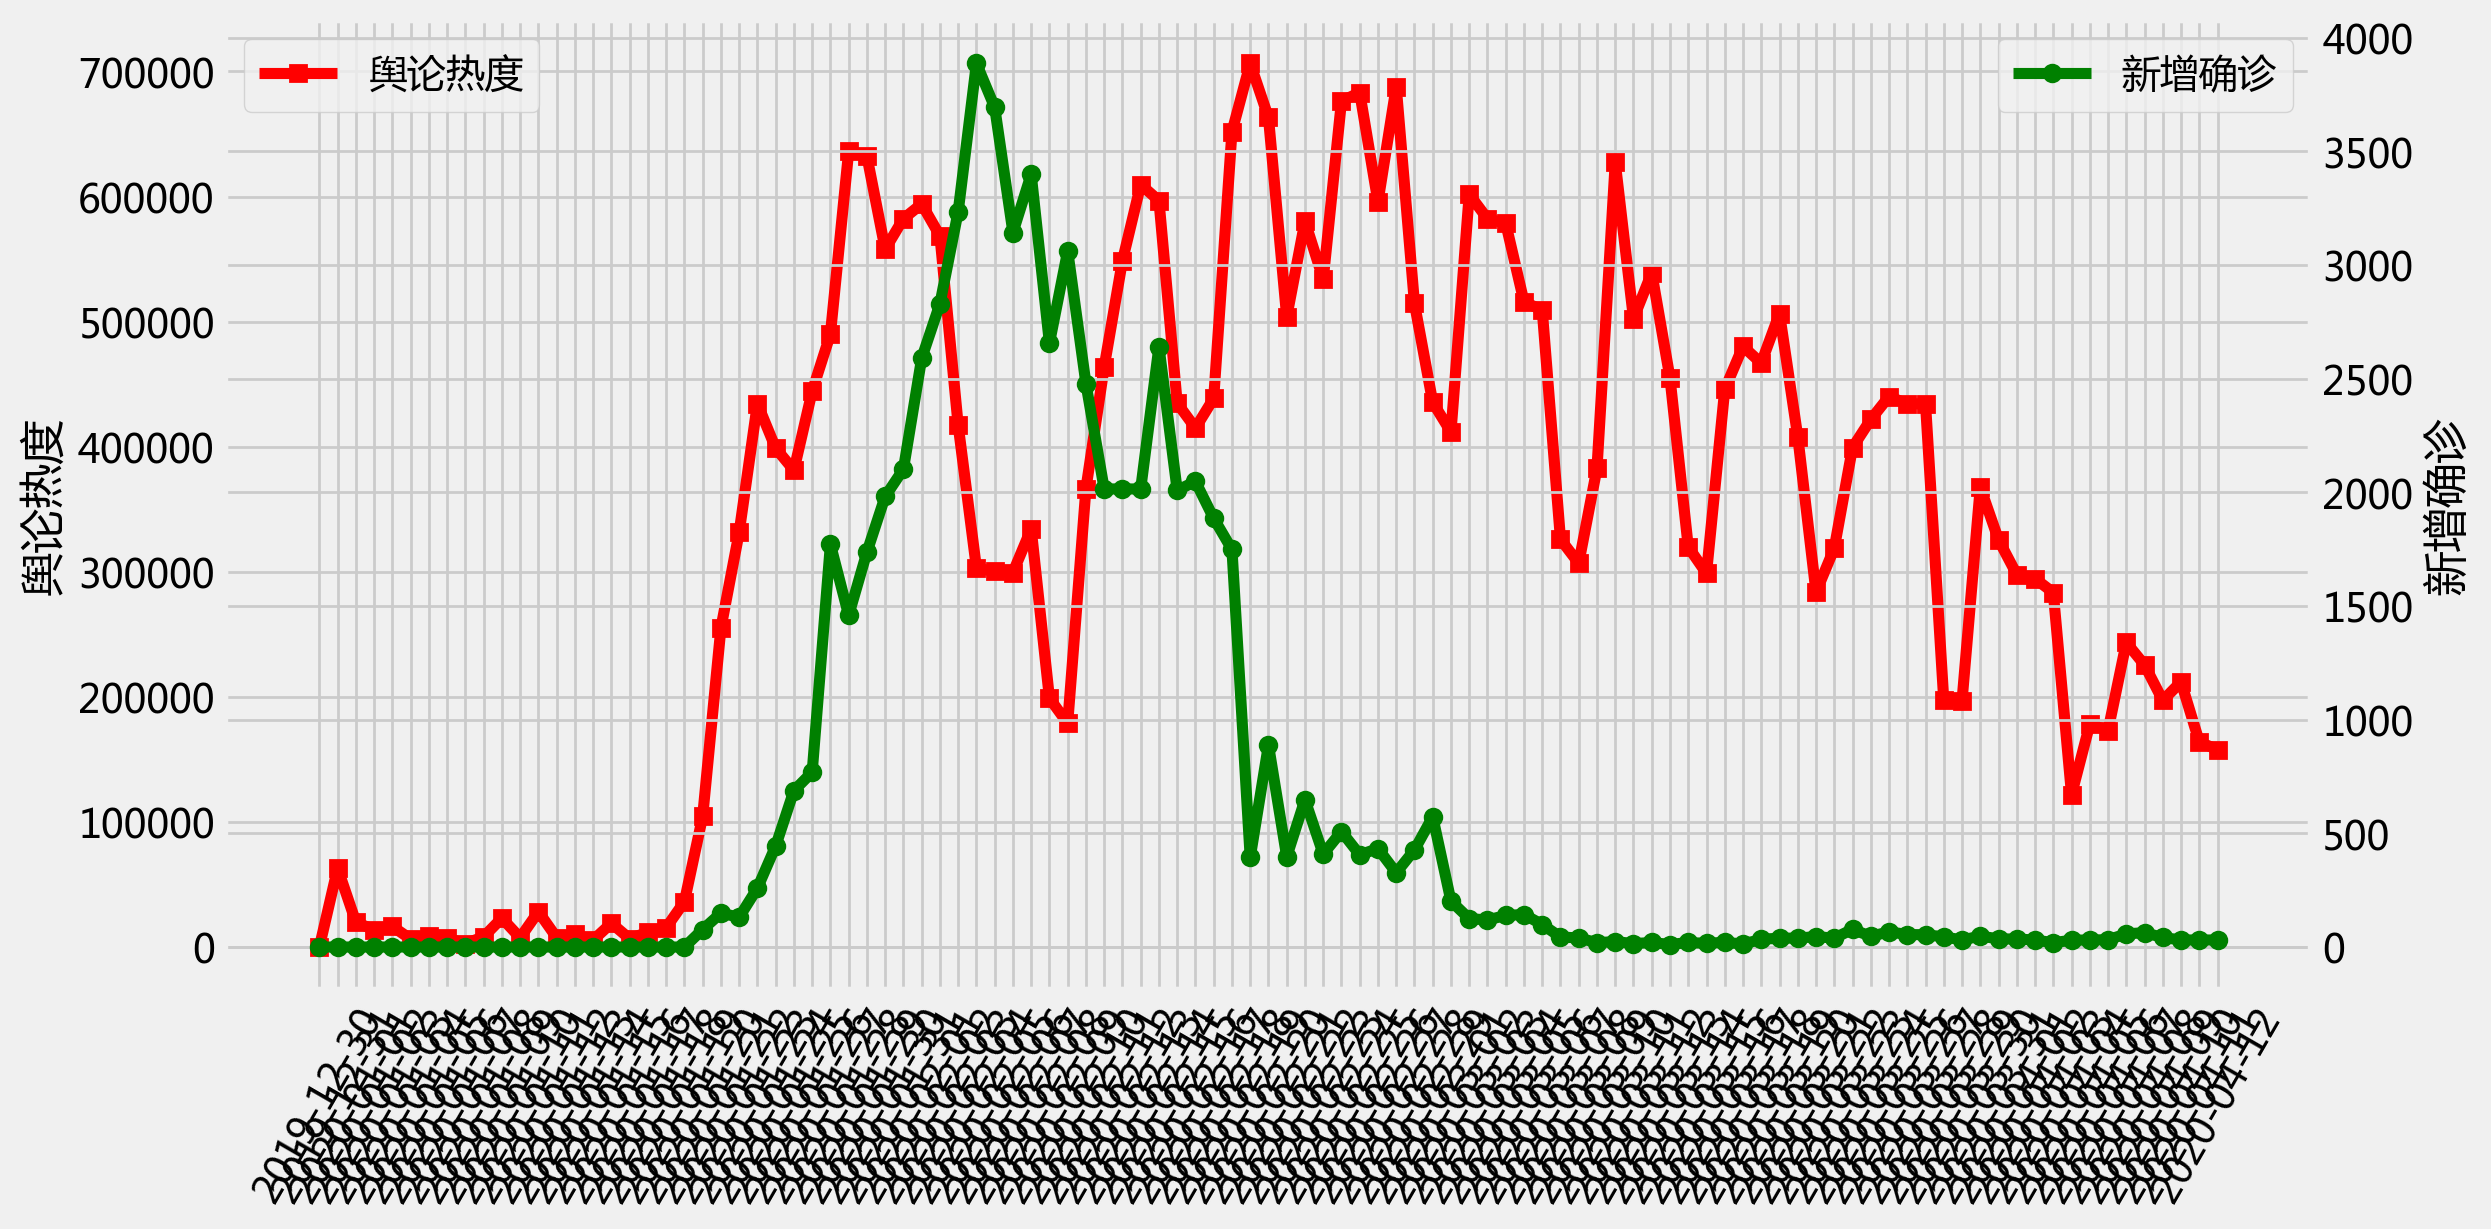

In [78]:
# plot
fig = plt.figure(figsize=(12,6),dpi = 200)
plt.style.use('fivethirtyeight')
ax1=fig.add_subplot(111)
ax1.plot(df['time'],  df['heat'], 'r-s')
ax1.set_ylabel('舆论热度', fontsize = 16)
ax1.tick_params(axis='x', rotation=60)
ax1.legend(('舆论热度',),loc='upper left')
ax2=ax1.twinx()
ax2.plot(df['time'], df['case'], 'g-o')
ax2.set_ylabel('新增确诊', fontsize = 16)
ax2.legend(('新增确诊',),loc='upper right')
plt.show()

In [79]:
data = df[21:][['case','heat' ]].pct_change().dropna()

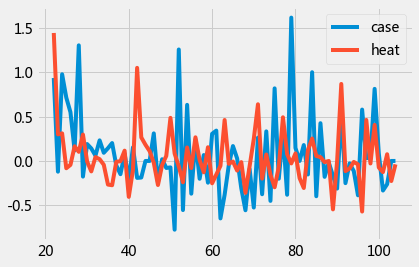

In [80]:
data.plot();

In [81]:
gc_res = grangercausalitytests(data,4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0104  , p=0.9189  , df_denom=79, df_num=1
ssr based chi2 test:   chi2=0.0108  , p=0.9172  , df=1
likelihood ratio test: chi2=0.0108  , p=0.9172  , df=1
parameter F test:         F=0.0104  , p=0.9189  , df_denom=79, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.7056  , p=0.0291  , df_denom=76, df_num=2
ssr based chi2 test:   chi2=7.8988  , p=0.0193  , df=2
likelihood ratio test: chi2=7.5370  , p=0.0231  , df=2
parameter F test:         F=3.7056  , p=0.0291  , df_denom=76, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6880  , p=0.1771  , df_denom=73, df_num=3
ssr based chi2 test:   chi2=5.5496  , p=0.1357  , df=3
likelihood ratio test: chi2=5.3656  , p=0.1469  , df=3
parameter F test:         F=1.6880  , p=0.1771  , df_denom=73, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1838  , p=0.3255  , df_d

In [82]:
data = df[21:][['heat','case' ]].pct_change().dropna()
gc_res = grangercausalitytests(data,4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3389  , p=0.5621  , df_denom=79, df_num=1
ssr based chi2 test:   chi2=0.3518  , p=0.5531  , df=1
likelihood ratio test: chi2=0.3511  , p=0.5535  , df=1
parameter F test:         F=0.3389  , p=0.5621  , df_denom=79, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4490  , p=0.6400  , df_denom=76, df_num=2
ssr based chi2 test:   chi2=0.9571  , p=0.6197  , df=2
likelihood ratio test: chi2=0.9514  , p=0.6214  , df=2
parameter F test:         F=0.4490  , p=0.6400  , df_denom=76, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2301  , p=0.8751  , df_denom=73, df_num=3
ssr based chi2 test:   chi2=0.7565  , p=0.8598  , df=3
likelihood ratio test: chi2=0.7530  , p=0.8607  , df=3
parameter F test:         F=0.2301  , p=0.8751  , df_denom=73, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3046  , p=0.8740  , df_d

# test the tails

In [83]:
#df = pd.read_excel('zhiwei_line_no_peak.xlsx')
df['heat'] = [float(i) for i in df['heat']]
df['case'] = [int(i) for i in df['case']]
df[40:]

,time,voice,heat,case,allCase
40,2020-02-08,,198955.9754,2656,37198
41,2020-02-09,,178865.4643,3062,40171
42,2020-02-10,,366537.5655,2478,42638
43,2020-02-11,,463839.3934,2015,44653
44,2020-02-12,,548711.0169,2015,59804
...,...,...,...,...,...
100,2020-04-08,,225533.0000,63,81865
101,2020-04-09,,197162.0000,42,81907
102,2020-04-10,,212046.0000,31,81953
103,2020-04-11,,164010.0000,31,82052


In [84]:
data = df[40:][['heat','case' ]].pct_change().dropna()
gc_res = grangercausalitytests(data,3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7319  , p=0.3957  , df_denom=60, df_num=1
ssr based chi2 test:   chi2=0.7685  , p=0.3807  , df=1
likelihood ratio test: chi2=0.7638  , p=0.3821  , df=1
parameter F test:         F=0.7319  , p=0.3957  , df_denom=60, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8160  , p=0.4473  , df_denom=57, df_num=2
ssr based chi2 test:   chi2=1.7752  , p=0.4117  , df=2
likelihood ratio test: chi2=1.7502  , p=0.4168  , df=2
parameter F test:         F=0.8160  , p=0.4473  , df_denom=57, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5435  , p=0.6546  , df_denom=54, df_num=3
ssr based chi2 test:   chi2=1.8419  , p=0.6059  , df=3
likelihood ratio test: chi2=1.8146  , p=0.6118  , df=3
parameter F test:         F=0.5435  , p=0.6546  , df_denom=54, df_num=3


In [85]:
data = df[40:][['case','heat' ]].pct_change().dropna()
gc_res = grangercausalitytests(data,3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4303  , p=0.5143  , df_denom=60, df_num=1
ssr based chi2 test:   chi2=0.4518  , p=0.5015  , df=1
likelihood ratio test: chi2=0.4502  , p=0.5022  , df=1
parameter F test:         F=0.4303  , p=0.5143  , df_denom=60, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7140  , p=0.1893  , df_denom=57, df_num=2
ssr based chi2 test:   chi2=3.7286  , p=0.1550  , df=2
likelihood ratio test: chi2=3.6208  , p=0.1636  , df=2
parameter F test:         F=1.7140  , p=0.1893  , df_denom=57, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0282  , p=0.3875  , df_denom=54, df_num=3
ssr based chi2 test:   chi2=3.4843  , p=0.3228  , df=3
likelihood ratio test: chi2=3.3884  , p=0.3355  , df=3
parameter F test:         F=1.0282  , p=0.3875  , df_denom=54, df_num=3


# Spurous Correlation

http://www.tylervigen.com/spurious-correlations

In [132]:
import numpy as np
suicide = [5427,5688,6198,6462,6635,7336,7248,7491,8161,8578,9000]
spending = [18.079,18.594,19.753,20.734,20.831,23.029,23.597,23.584,25.525,27.731,29.449]
d = np.array([suicide, spending])

In [133]:
df = pd.DataFrame(d.T, columns = ['suicide', 'spending']) # .pct_change().dropna()

In [135]:
data = df[['suicide','spending' ]].pct_change().dropna()
gc_res = grangercausalitytests(data,2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.6049  , p=0.0330  , df_denom=6, df_num=1
ssr based chi2 test:   chi2=11.4073 , p=0.0007  , df=1
likelihood ratio test: chi2=7.3680  , p=0.0066  , df=1
parameter F test:         F=7.6049  , p=0.0330  , df_denom=6, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5180  , p=0.6408  , df_denom=3, df_num=2
ssr based chi2 test:   chi2=2.7627  , p=0.2512  , df=2
likelihood ratio test: chi2=2.3731  , p=0.3053  , df=2
parameter F test:         F=0.5180  , p=0.6408  , df_denom=3, df_num=2


In [136]:
data = df[['spending', 'suicide' ]].pct_change().dropna()
gc_res = grangercausalitytests(data,2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5229  , p=0.1633  , df_denom=6, df_num=1
ssr based chi2 test:   chi2=3.7844  , p=0.0517  , df=1
likelihood ratio test: chi2=3.1590  , p=0.0755  , df=1
parameter F test:         F=2.5229  , p=0.1633  , df_denom=6, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1465  , p=0.8695  , df_denom=3, df_num=2
ssr based chi2 test:   chi2=0.7814  , p=0.6766  , df=2
likelihood ratio test: chi2=0.7455  , p=0.6888  , df=2
parameter F test:         F=0.1465  , p=0.8695  , df_denom=3, df_num=2
